In [1]:
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
import statsmodels.api as sm

from scipy import stats
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

In [2]:
# method to create array and add variables 1001 and 1002 to the end
def create_array():
    row = np.random.normal(size = 1000)
    indices = [33, 261, 425, 768, 902]
    valSum = 0
    noise = np.random.normal(loc = 0, scale = 2)

    for index in indices:
        val = row[index - 1]
        valSum += val

    binaryVal = 0
    if valSum > 0:
        binaryVal = 1
        
    continuousVal = valSum + noise

    row = np.append(row, binaryVal)
    row = np.append(row, continuousVal)
    
    return row

In [3]:
cols = []
for x in range(1, 1003):
    cols.append(x)

matrix = pd.DataFrame(columns = cols)

for x in range(100):
    row = create_array()
    matrix.loc[len(matrix)] = row

In [4]:
matrix

,1,2,3,4,5,6,7,8,9,10,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.231902,0.333583,-1.090842,-0.480870,0.277768,-0.029593,0.049050,-0.147287,1.306118,-1.639714,...,0.463677,0.058995,1.381457,-0.401191,1.775441,0.703685,-0.230953,-0.473301,0.0,-2.084477
1,0.730115,-0.364508,-1.495345,-1.979460,-1.057084,1.120579,1.311730,1.861074,-1.539727,1.158757,...,1.042996,-1.753553,-0.976134,0.492796,0.022123,-0.916848,-1.752081,-0.269383,0.0,2.143268
2,0.154405,-1.666534,-0.503087,-0.783315,-0.920017,-0.161978,-1.102377,-0.007656,-0.107818,-0.383683,...,-1.536873,-0.742319,-0.004179,-0.691638,0.927734,0.008517,0.637348,0.770118,0.0,-4.675374
3,-0.258307,-0.791088,-1.235075,-0.361767,0.559439,-0.243011,-1.180952,1.990600,0.672916,0.280049,...,0.210920,-0.210609,-1.878760,-0.611655,0.137062,0.226538,-0.148059,-1.663069,1.0,1.194613
4,0.050043,-2.072087,0.776171,-0.846890,2.200418,-1.477423,-1.182965,0.395723,0.306278,-0.822939,...,-0.931956,0.481937,1.299427,0.121148,-0.046655,-0.921714,-1.202951,1.327183,0.0,-0.409688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.883902,-0.880416,-0.727633,-1.220233,1.004045,-0.598758,0.697912,-0.602780,-0.686305,1.041795,...,0.468297,0.276989,-1.096693,-0.486812,2.294008,0.465136,0.410368,-1.555701,0.0,2.468485
96,2.051216,-1.569908,-0.318058,-2.497640,-0.739865,0.870874,-1.619708,0.443185,-0.326985,-0.693990,...,-0.769139,-1.229791,-2.547762,0.046297,-0.872657,-0.007008,0.997694,-2.505109,0.0,0.125485
97,-0.449014,0.480686,-2.066833,0.216435,-0.286752,0.448311,0.301608,-0.787593,-1.164078,1.406947,...,0.457126,-1.121955,0.363776,-0.071156,2.062127,-0.490242,1.054003,0.024969,1.0,2.749203
98,-1.289346,-1.625170,2.398815,0.899131,0.926852,0.064952,-0.669783,-1.112477,0.790093,-0.908993,...,1.651455,0.566054,-1.186161,0.282517,0.044021,-0.664189,-0.067284,-0.797471,0.0,-0.842974


# Part A

In [5]:
coefficients = []

# correlation coefficients
for colIndex in range(1, 1001):
    corCoef = stats.pearsonr(matrix[colIndex], matrix[1002])[0]
    coefficients.append(corCoef)

In [6]:
# get sorted indices [smallest to largest]
sortedIndices = np.argsort(coefficients)
topTen = sortedIndices[990:]

# index + 1 to get the actual variable number rather than column index
for index in reversed(topTen):
    print('Variable: {0} ... Correlation Coefficient: {1}'.format(index + 1, coefficients[index]))

Variable: 768 ... Correlation Coefficient: 0.40371806275873656
Variable: 91 ... Correlation Coefficient: 0.31321761915494023
Variable: 261 ... Correlation Coefficient: 0.3083292347415342
Variable: 902 ... Correlation Coefficient: 0.30560356912185077
Variable: 464 ... Correlation Coefficient: 0.2893808127066682
Variable: 549 ... Correlation Coefficient: 0.2807049354646841
Variable: 368 ... Correlation Coefficient: 0.24817897077623335
Variable: 506 ... Correlation Coefficient: 0.24323086484229656
Variable: 626 ... Correlation Coefficient: 0.23997658451597365
Variable: 124 ... Correlation Coefficient: 0.23659828125690158


In [7]:
# of the five variables (33, 261, 425, 768, 902), three of them are a part of the 
#      top ten variables with the highest correlation coeffients with variable 1002,
#      with the ones not there being 33 and 425

# Part B

In [8]:
xCols = []
for val in topTen:
    xCols.append(val + 1)

x = matrix[xCols]
y = matrix[[1002]]

model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   1002   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.488
Method:                 Least Squares   F-statistic:                              10.53
Date:                Fri, 02 Dec 2022   Prob (F-statistic):                    1.38e-11
Time:                        21:36:11   Log-Likelihood:                         -206.19
No. Observations:                 100   AIC:                                      432.4
Df Residuals:                      90   BIC:                                      458.4
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
# of the five variables (33, 261, 425, 768, 902), all three of them in the model are 
#      significant with 95% significance. Of the other variables, 506 and 91 are
#      significant with 95% significance

# Part C

In [10]:
model = sm.OLS(y, x).fit_regularized(alpha = 0.1)

model.params

124    0.092272
626    0.208581
506    0.511722
368    0.186153
549    0.207847
464    0.324902
902    1.028928
261    0.664811
91     0.361189
768    0.851734
dtype: float64

In [11]:
# for lambda = 0.1, no variables have a coefficient of 0 and of the three variables
#      in the model, all are kept in the model

In [12]:
model = sm.OLS(y, x).fit_regularized(alpha = 1)

model.params

124    0.0
626    0.0
506    0.0
368    0.0
549    0.0
464    0.0
902    0.0
261    0.0
91     0.0
768    0.0
dtype: float64

In [13]:
# for lambda = 1, all the variables have a coefficient of 0 and of the three variables
#      in the model, none are kept in the model

In [14]:
model = sm.OLS(y, x).fit_regularized(alpha = 10)

model.params

124    0.0
626    0.0
506    0.0
368    0.0
549    0.0
464    0.0
902    0.0
261    0.0
91     0.0
768    0.0
dtype: float64

In [15]:
# for lambda = 10, all the variables have a coefficient of 0 and of the three variables
#      in the model, none are kept in the model

# Part D

In [16]:
matrix

,1,2,3,4,5,6,7,8,9,10,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.231902,0.333583,-1.090842,-0.480870,0.277768,-0.029593,0.049050,-0.147287,1.306118,-1.639714,...,0.463677,0.058995,1.381457,-0.401191,1.775441,0.703685,-0.230953,-0.473301,0.0,-2.084477
1,0.730115,-0.364508,-1.495345,-1.979460,-1.057084,1.120579,1.311730,1.861074,-1.539727,1.158757,...,1.042996,-1.753553,-0.976134,0.492796,0.022123,-0.916848,-1.752081,-0.269383,0.0,2.143268
2,0.154405,-1.666534,-0.503087,-0.783315,-0.920017,-0.161978,-1.102377,-0.007656,-0.107818,-0.383683,...,-1.536873,-0.742319,-0.004179,-0.691638,0.927734,0.008517,0.637348,0.770118,0.0,-4.675374
3,-0.258307,-0.791088,-1.235075,-0.361767,0.559439,-0.243011,-1.180952,1.990600,0.672916,0.280049,...,0.210920,-0.210609,-1.878760,-0.611655,0.137062,0.226538,-0.148059,-1.663069,1.0,1.194613
4,0.050043,-2.072087,0.776171,-0.846890,2.200418,-1.477423,-1.182965,0.395723,0.306278,-0.822939,...,-0.931956,0.481937,1.299427,0.121148,-0.046655,-0.921714,-1.202951,1.327183,0.0,-0.409688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.883902,-0.880416,-0.727633,-1.220233,1.004045,-0.598758,0.697912,-0.602780,-0.686305,1.041795,...,0.468297,0.276989,-1.096693,-0.486812,2.294008,0.465136,0.410368,-1.555701,0.0,2.468485
96,2.051216,-1.569908,-0.318058,-2.497640,-0.739865,0.870874,-1.619708,0.443185,-0.326985,-0.693990,...,-0.769139,-1.229791,-2.547762,0.046297,-0.872657,-0.007008,0.997694,-2.505109,0.0,0.125485
97,-0.449014,0.480686,-2.066833,0.216435,-0.286752,0.448311,0.301608,-0.787593,-1.164078,1.406947,...,0.457126,-1.121955,0.363776,-0.071156,2.062127,-0.490242,1.054003,0.024969,1.0,2.749203
98,-1.289346,-1.625170,2.398815,0.899131,0.926852,0.064952,-0.669783,-1.112477,0.790093,-0.908993,...,1.651455,0.566054,-1.186161,0.282517,0.044021,-0.664189,-0.067284,-0.797471,0.0,-0.842974


In [17]:
for colIndex in range(1, 1001):
    for rowIndex in range(100):
        value = matrix[colIndex][rowIndex]
        binaryVal = 0
        if value > 0:
            binaryVal = 1
        matrix.loc[rowIndex, colIndex] = binaryVal
        
matrix

,1,2,3,4,5,6,7,8,9,10,...,993,994,995,996,997,998,999,1000,1001,1002
0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,-2.084477
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.143268
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-4.675374
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.194613
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.409688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.468485
96,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.125485
97,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,2.749203
98,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.842974


In [18]:
concordance = []

for colIndex in range(1, 1001):
    numSame = 0
    for rowIndex in range(100):
        value = matrix[colIndex][rowIndex]
        targetVal = matrix[1001][rowIndex]
        isSame = False
        if value == targetVal:
            numSame += 1
            
    concordance.append(numSame)

In [19]:
# get sorted indices [smallest to largest]
sortedConcordanceIndices = np.argsort(concordance)
topConcordanceTen = sortedConcordanceIndices[990:]

# index + 1 to get the actual variable number rather than column index
for index in reversed(topConcordanceTen):
    print('Variable: {0} ... Concordance Score: {1}'.format(index + 1, concordance[index]))

Variable: 902 ... Concordance Score: 68
Variable: 425 ... Concordance Score: 68
Variable: 33 ... Concordance Score: 65
Variable: 935 ... Concordance Score: 64
Variable: 768 ... Concordance Score: 64
Variable: 261 ... Concordance Score: 63
Variable: 267 ... Concordance Score: 62
Variable: 678 ... Concordance Score: 62
Variable: 38 ... Concordance Score: 62
Variable: 163 ... Concordance Score: 62


In [20]:
# of the five variables (33, 261, 425, 768, 902), all of them are a part of the 
#      top ten variables with the highest concordance with variable 1001

# Part E

In [21]:
xCols

[124, 626, 506, 368, 549, 464, 902, 261, 91, 768]

In [22]:
xTrain = matrix[xCols]
yTrain = matrix[[1001]]
xTrain

,124,626,506,368,549,464,902,261,91,768
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
96,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
97,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
98,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [23]:
modelNB = GaussianNB()
modelNB.fit(xTrain, yTrain)

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
xCols = []
for val in topConcordanceTen:
    xCols.append(val + 1)

varZeros = []
varOnes = []

# iterate through variables
for colIndex in xCols:
    numZero = 0
    numOne = 0
    for rowIndex in range(100):
        # see if value is 1
        value = matrix[colIndex][rowIndex]
        if value == 1:
            # see if the target value is zero or one
            target = matrix[1001][rowIndex]
            if target == 0:
                numZero += 1
            else:
                numOne += 1
    varZeros.append(numZero)
    varOnes.append(numOne)

In [25]:
varZeros

[24, 27, 30, 26, 21, 28, 20, 20, 17, 18]

In [26]:
varOnes

[23, 26, 29, 25, 21, 29, 21, 22, 22, 23]

In [27]:
columns = ['Y = 0', 'Y = 1']
table = pd.DataFrame(columns = columns)

for index in range(10):
    numZero = varZeros[index]
    numOne = varOnes[index]
    rowVals = [numZero, numOne]
    table.loc[len(table)] = rowVals
    
rowLabels = []

for col in xCols:
    text = 'x[{0}] = 1'.format(col)
    rowLabels.append(text)
    
table[''] = rowLabels
table.set_index('', inplace = True)

table

,Y = 0,Y = 1
,,
x[163] = 1,24,23
x[38] = 1,27,26
x[678] = 1,30,29
x[267] = 1,26,25
x[261] = 1,21,21
x[768] = 1,28,29
x[935] = 1,20,21
x[33] = 1,20,22
x[425] = 1,17,22


# Part F

In [28]:
x = matrix[xCols]
y = matrix[[1001]]

scoring = ['accuracy', 'precision', 'recall', 'f1']

cv = LeaveOneOut()
model = GaussianNB()

scores = cross_validate(model, x, y, scoring = scoring, cv = cv)

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/uti

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/uti

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/uti

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1599: UndefinedMetricWarning

In [29]:
scores['test_accuracy'].mean()

0.78

In [30]:
scores['test_accuracy'].var()

0.17160000000000003

In [31]:
scores['test_precision'].mean()

0.24

In [32]:
scores['test_precision'].var()

0.1824

In [33]:
scores['test_recall'].mean()

0.24

In [34]:
scores['test_recall'].var()

0.1824

In [35]:
scores['test_f1'].mean()

0.24

In [36]:
scores['test_f1'].var()

0.1824

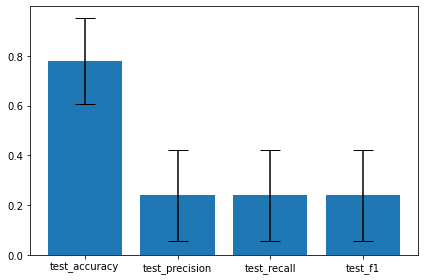

In [37]:
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
xPositions = np.arange(len(metrics))
means = [scores['test_accuracy'].mean(), scores['test_precision'].mean(), 
         scores['test_recall'].mean(), scores['test_f1'].mean()]
errors = [scores['test_accuracy'].var(), scores['test_precision'].var(), 
         scores['test_recall'].var(), scores['test_f1'].var()]

fig, ax = plot.subplots()
ax.bar(xPositions, means, yerr = errors, align = 'center', 
       ecolor='black', capsize = 10)
ax.set_xticks(xPositions)
ax.set_xticklabels(metrics)

plot.tight_layout()
plot.show()

# Part G

In [38]:
# new 50 rows
cols = []
for x in range(1, 1003):
    cols.append(x)

testMatrix = pd.DataFrame(columns = cols)

for x in range(50):
    row = create_array()
    testMatrix.loc[len(testMatrix)] = row
    
# top 10 variables     
xCols.sort()
xCols.append(1001)
    
testMatrix = testMatrix[xCols]
testMatrix.head()

,33,38,163,261,267,425,678,768,902,935,1001
0,0.501716,-0.896701,-0.692929,-0.682516,1.248645,1.783448,0.018767,0.267203,0.364169,-0.885093,1.0
1,2.303632,-2.393021,0.359815,1.045729,-1.098284,0.132063,-1.742935,1.400768,-1.291710,-0.187346,1.0
2,0.762125,0.284414,-1.085613,-1.301076,0.048580,-2.180130,0.561566,0.644133,-0.036897,1.715071,0.0
3,2.766042,0.303910,0.171487,-0.695383,-1.735284,-1.160049,-0.216137,-0.818160,0.301204,-0.175370,1.0
4,-1.091824,-1.002842,-0.465303,-1.553125,0.552670,-0.588400,0.850201,-0.306687,-0.372829,2.142161,0.0


In [39]:
for colIndex in xCols:
    for rowIndex in range(50):
        value = testMatrix[colIndex][rowIndex]
        binaryVal = 0
        if value > 0:
            binaryVal = 1
        testMatrix.loc[rowIndex, colIndex] = binaryVal
        
testMatrix.head()

,33,38,163,261,267,425,678,768,902,935,1001
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
xTest = testMatrix[xCols[:-1]]
yTest = testMatrix[[1001]]
xTest.head()

,33,38,163,261,267,425,678,768,902,935
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [41]:
predictions = modelNB.predict(xTest)
predictions

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

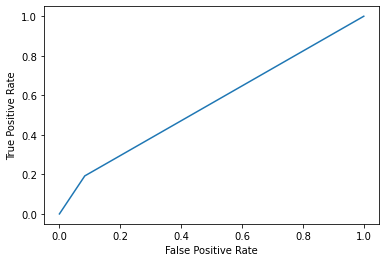

In [45]:
from sklearn import metrics

# ROC curve
false, true, thresh = metrics.roc_curve(yTest, predictions)

plot.plot(false, true)
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

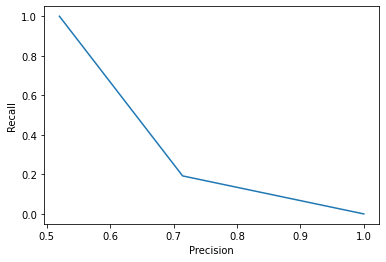

In [46]:
# precision recall curve
prec, rec, thresh = metrics.precision_recall_curve(yTest, predictions)

plot.plot(prec, rec)
plot.xlabel('Precision')
plot.ylabel('Recall')
plot.show()